In [1]:
import sys

!{sys.executable} -m pip install numpy
import numpy as np

!{sys.executable} -m pip install pandas
import pandas as pd

!{sys.executable} -m pip install nltk
import nltk

!{sys.executable} -m pip install sklearn
from sklearn import metrics
from sklearn.feature_extraction.text import  CountVectorizer 
from sklearn.decomposition import LatentDirichletAllocation

from pprint import pprint
!{sys.executable} -m pip install pyLDAvis 
import pyLDAvis
import pyLDAvis.sklearn

import matplotlib.pyplot as plt
%matplotlib inline

%run ./Text_Normalization_Function.ipynb 

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)


Original:   <p>The circus dog in a plissé skirt jumped over Python who wasn't that large, just 3 feet long.</p>
Processed:  ['<', 'p', '>', 'The', 'circus', 'dog', 'in', 'a', 'plissé', 'skirt', 'jumped', 'over', 'Python', 'who', 'was', "n't", 'that', 'large', ',', 'just', '3', 'feet', 'long.', '<', '/p', '>']
Original:   <p>The circus dog in a plissé skirt jumped over Python who wasn't that large, just 3 feet long.</p>
Processed:  <p>The circus dog in a plissé skirt jumped over Python who was not that large, just 3 feet long.</p>
Original:   <p>The circus dog in a plissé skirt jumped over Python who wasn't that large, just 3 feet long.</p>


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\xiong\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\xiong\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\xiong\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\xiong\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Processed:  [('<', 'a'), ('p', 'n'), ('>', 'v'), ('the', None), ('circus', 'n'), ('dog', 'n'), ('in', None), ('a', None), ('plissé', 'n'), ('skirt', 'n'), ('jumped', 'v'), ('over', None), ('python', 'n'), ('who', None), ('was', 'v'), ("n't", 'r'), ('that', None), ('large', 'a'), (',', None), ('just', 'r'), ('3', None), ('feet', 'n'), ('long.', 'a'), ('<', 'n'), ('/p', 'n'), ('>', 'n')]
Original:   <p>The circus dog in a plissé skirt jumped over Python who wasn't that large, just 3 feet long.</p>
Processed:  < p > the circus dog in a plissé skirt jump over python who be n't that large , just 3 foot long. < /p >
Original:   <p>The circus dog in a plissé skirt jumped over Python who wasn't that large, just 3 feet long.</p>
Processed:    p   The circus dog in a plissé skirt jumped over Python who was n t that large   just 3 feet long     p  
Original:   <p>The circus dog in a plissé skirt jumped over Python who wasn't that large, just 3 feet long.</p>
Processed:  < p > The circus dog pliss

In [2]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))
        
def get_topic_words(vectorizer, lda_model, n_words):
    keywords = np.array(vectorizer.get_feature_names())
    topic_words = []
    for topic_weights in lda_model.components_:
        top_word_locs = (-topic_weights).argsort()[:n_words]
        topic_words.append(keywords.take(top_word_locs).tolist())
    return topic_words

In [3]:
#Upload dataset
df = pd.read_csv (r'Reviews.csv')
reviews = df["Text"]
reviews


0         I have bought several of the Vitality canned d...
1         Product arrived labeled as Jumbo Salted Peanut...
2         This is a confection that has been around a fe...
3         If you are looking for the secret ingredient i...
4         Great taffy at a great price.  There was a wid...
                                ...                        
568449    Great for sesame chicken..this is a good if no...
568450    I'm disappointed with the flavor. The chocolat...
568451    These stars are small, so you can give 10-15 o...
568452    These are the BEST treats for training and rew...
568453    I am very satisfied ,product is as advertised,...
Name: Text, Length: 568454, dtype: object

Original:   <p>The circus dog in a plissé skirt jumped over Python who wasn't that large, just 3 feet long.</p>
Processed:  ['<', 'p', '>', 'The', 'circus', 'dog', 'in', 'a', 'plissé', 'skirt', 'jumped', 'over', 'Python', 'who', 'was', "n't", 'that', 'large', ',', 'just', '3', 'feet', 'long.', '<', '/p', '>']
Original:   <p>The circus dog in a plissé skirt jumped over Python who wasn't that large, just 3 feet long.</p>
Processed:  <p>The circus dog in a plissé skirt jumped over Python who was not that large, just 3 feet long.</p>
Original:   <p>The circus dog in a plissé skirt jumped over Python who wasn't that large, just 3 feet long.</p>
Processed:  [('<', 'a'), ('p', 'n'), ('>', 'v'), ('the', None), ('circus', 'n'), ('dog', 'n'), ('in', None), ('a', None), ('plissé', 'n'), ('skirt', 'n'), ('jumped', 'v'), ('over', None), ('python', 'n'), ('who', None), ('was', 'v'), ("n't", 'r'), ('that', None), ('large', 'a'), (',', None), ('just', 'r'), ('3', None), ('feet', 'n'), ('long.', 'a'), 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\xiong\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\xiong\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\xiong\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\xiong\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
C:\Users\xiong\AppData\Local\Temp/ipykernel_32704/3526566498.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_s['datestamp']

Dimensions for test data: (10000, 2)
Dimensions for training data: (1000, 2) 

First 5 rows in test dataset: 
                                                      Text  Polarity
387842  This cream puffs taste is very light, unusual ...   negtive
557901  I love Tully's House Blend K-Cups! I have seve...  positive
226277  I recently received a soda stream, and have be...   negtive
528179  I can't really review this coffee on it's own,...  positive
118411  Bandit is a new resident in our friend's new h...  positive 

First 5 rows in  training dataset: 
                                                      Text  Polarity
403755  Very unsatisfied I got it two days later which...   negtive
554152  This is what it is. It's a hollow bone with no...  positive
59737   This is the only formula we used once I stoppe...  positive
408470  Perfect for a romantic dinner for 2.  The stea...  positive
327435  Both my Pom and shirian love dr Harvey's ! Ver...  positive


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\xiong\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


I like this brand a lot 
Scores: {'neg': 0.0, 'neu': 0.545, 'pos': 0.455, 'compound': 0.3612} 

I love the function of it 
Scores: {'neg': 0.0, 'neu': 0.488, 'pos': 0.512, 'compound': 0.6369} 

Not sure if this was an error or if the vendor intended to represent the product as "Jumbo". 
Scores: {'neg': 0.226, 'neu': 0.774, 'pos': 0.0, 'compound': -0.5664} 

I hate the plot of this product :( 
Scores: {'neg': 0.569, 'neu': 0.431, 'pos': 0.0, 'compound': -0.765} 

Review:-
Great addition to a care package for lazy, hungry college students. The low sugar jelly tastes great, just like regular jelly, and is good for you too! Super fast shipping and great price!!
Actual Labeled Sentiment: positive

Review:-
Wrigley has modified this product from the original taste, which was quite pleasant, to one I would describe as chewable cardboard. I've been using the winterfrost and spearmint Eclipse products for many years as I do not like the taste of competitive products. And it has had relatively c

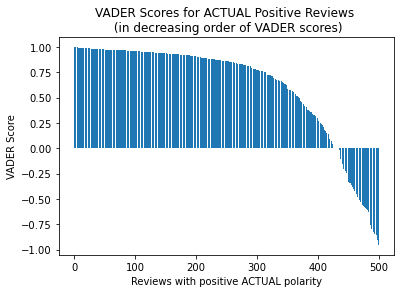

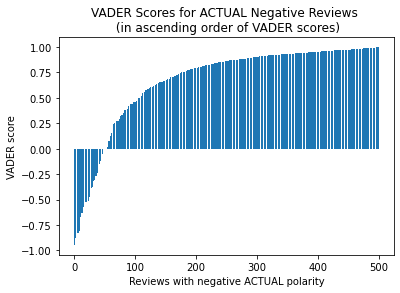

Accuracy rate:  0.7208


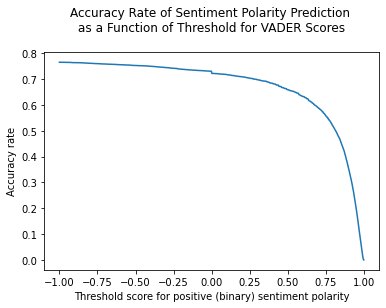

In [4]:
%run ./Sentiment_Analysis.ipynb 

In [53]:
sample_pos=test_data.loc[test_data['vader_sentiment']=='positive']['Text']
sample_neg=test_data.loc[test_data['vader_sentiment']=='negative']['Text']
sample_pos

0       This cream puffs taste is very light, unusual ...
2       I recently received a soda stream, and have be...
3       I can't really review this coffee on it's own,...
4       Bandit is a new resident in our friend's new h...
5       Hard to find this flavor (Chicken Hearts and L...
                              ...                        
9993    I drank this tea at least 4 days a week during...
9994    Warning: These are so addictive.<br /><br />I ...
9995    My girls love these so much that I have a hard...
9998    Great product and fast shipping! Would definit...
9999    I wasn't a fan of drinking this as it is, so I...
Name: Text, Length: 8594, dtype: object

In [6]:
normalized_reviews_neg = normalize_corpus(sample_neg) 
normalized_reviews_neg



['love tully house blend k cups several dozen flavor always reach tully house blend right wake morning throughout day strong bold strong enough hyper people run order right think stop review think',
 'subscription program deliver month rock drop door',
 'another reviewer remark bottle leak arrive mine bad package design know guy shower product shelf shower shampoo bottle rest entirely tall top heavy bottle fall environment appreciate handed snap open lid need much squatter bottle prevent frequent fall guess tall caddy good fit gym bag either attack packaging scent pleasant side much expect herbal smell range subtle welcome overpower obnoxious mint green tea essence fight formula smell could awful obtrusive result sense freshness rather heavily perfume conditioner work quite well hair become oily course day favor shampoos good remove oil unfortunate side effect stripped hair become damaged fly away lifeless conditioner clear men light enough avoid add greasy head woe present enough add 

In [7]:
bow_vectorizer_neg = CountVectorizer(max_features=1000)
bow_reviews_neg = bow_vectorizer_neg.fit_transform(normalized_reviews_neg)

In [8]:
pd.DataFrame(data = bow_reviews_neg.todense(), columns = bow_vectorizer_neg.get_feature_names())

,able,absolutely,accord,acid,acidic,actual,actually,add,added,addict,...,wrap,wrapper,write,wrong,yard,year,yellow,yes,yet,yum
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,3,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1401,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1402,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1403,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1404,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
#Coherence Scores

# topic modeling evaluation
!{sys.executable} -m pip install gensim
import gensim

from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora.dictionary import Dictionary
#tokenizing the corpus
reviews_corpus_tokenized = [tokenize_text(normalized_reviews_neg[doc_id]) for doc_id in range(len(normalized_reviews_neg))]

#Dictionary of the corpus:
reviews_dictionary = Dictionary(reviews_corpus_tokenized)

#Bag-of-words representation for each document of the corpus:
reviews_corpus_bow = [reviews_dictionary.doc2bow(doc) for doc in reviews_corpus_tokenized]



In [47]:
#fit LDA with 4 topics:
lda_reviews_4_topics = LatentDirichletAllocation(n_components=4, max_iter=40,
                                              doc_topic_prior = 0.24,
                                              topic_word_prior = 0.24).fit(bow_reviews_neg)
#Log-Likelihood
print("Log-Likelihood (higher values are better) for 4-topic model: ", lda_reviews_4_topics.score(bow_reviews_neg))

#Perplexity score:
print("Perplexity (lower values are better): ", lda_reviews_4_topics.perplexity(bow_reviews_neg))

#coherence score for 4 topics:
topic_topwords_4_topics = get_topic_words(vectorizer = bow_vectorizer_neg, lda_model = lda_reviews_4_topics, n_words=20)
cm_4_topics = CoherenceModel(topics=topic_topwords_4_topics, 
                             corpus =  reviews_corpus_bow, 
                             dictionary = reviews_dictionary, coherence='u_mass')
#overall coherence score for the model:
print("Coherence score for the model: (higher values are better)", np.round(cm_4_topics.get_coherence(), 4))

Log-Likelihood (higher values are better) for 4-topic model:  -224197.46234485286
Perplexity (lower values are better):  602.9297570842706
Coherence score for the model: (higher values are better) -2.4778


In [48]:
#fit LDA with 5 topics:
lda_reviews_5_topics = LatentDirichletAllocation(n_components=5, max_iter=50,
                                              doc_topic_prior = 0.25,
                                              topic_word_prior = 0.25).fit(bow_reviews_neg)
#Log-Likelihood
print("Log-Likelihood (higher values are better) for 5-topic model: ", lda_reviews_5_topics.score(bow_reviews_neg))

#Perplexity score:
print("Perplexity (lower values are better): ", lda_reviews_5_topics.perplexity(bow_reviews_neg))

#coherence score for 5 topics:
topic_topwords_5_topics = get_topic_words(vectorizer = bow_vectorizer_neg, lda_model = lda_reviews_5_topics, n_words=20)
cm_5_topics = CoherenceModel(topics=topic_topwords_5_topics, 
                             corpus =  reviews_corpus_bow, 
                             dictionary = reviews_dictionary, coherence='u_mass')
#overall coherence score for the model:
print("Coherence score for the model: (higher values are better)", np.round(cm_5_topics.get_coherence(), 4))


Log-Likelihood (higher values are better) for 5-topic model:  -224237.73186864017
Perplexity (lower values are better):  603.6234454074892
Coherence score for the model: (higher values are better) -2.2947


In [52]:
#fit LDA with 6 topics:
lda_reviews_6_topics = LatentDirichletAllocation(n_components=6, max_iter=60,
                                              doc_topic_prior = 0.26,
                                              topic_word_prior = 0.26).fit(bow_reviews_neg)
#Log-Likelihood
print("Log-Likelihood (higher values are better) for 6-topic model: ", lda_reviews_6_topics.score(bow_reviews_neg))

#Perplexity score:
print("Perplexity (lower values are better): ", lda_reviews_6_topics.perplexity(bow_reviews_neg))

#coherence score for 6 topics:
topic_topwords_6_topics = get_topic_words(vectorizer = bow_vectorizer_neg, lda_model = lda_reviews_6_topics, n_words=20)
cm_6_topics = CoherenceModel(topics=topic_topwords_6_topics, 
                             corpus =  reviews_corpus_bow, 
                             dictionary = reviews_dictionary, coherence='u_mass')
#overall coherence score for the model:
print("Coherence score for the model: (higher values are better)", np.round(cm_6_topics.get_coherence(), 4))

Log-Likelihood (higher values are better) for 6-topic model:  -224878.87961949798
Perplexity (lower values are better):  614.7760722972182
Coherence score for the model: (higher values are better) -3.5355


In [50]:
#fit LDA with 7 topics:
lda_reviews_7_topics = LatentDirichletAllocation(n_components=7, max_iter=70,
                                              doc_topic_prior = 0.27,
                                              topic_word_prior = 0.27).fit(bow_reviews_neg)
#Log-Likelihood
print("Log-Likelihood (higher values are better) for 7-topic model: ", lda_reviews_7_topics.score(bow_reviews_neg))

#Perplexity score:
print("Perplexity (lower values are better): ", lda_reviews_7_topics.perplexity(bow_reviews_neg))

#coherence score for 7 topics:
topic_topwords_7_topics = get_topic_words(vectorizer = bow_vectorizer_neg, lda_model = lda_reviews_7_topics, n_words=20)
cm_7_topics = CoherenceModel(topics=topic_topwords_7_topics, 
                             corpus =  reviews_corpus_bow, 
                             dictionary = reviews_dictionary, coherence='u_mass')
#overall coherence score for the model:
print("Coherence score for the model: (higher values are better)", np.round(cm_7_topics.get_coherence(), 4))


Log-Likelihood (higher values are better) for 7-topic model:  -225274.03765297608
Perplexity (lower values are better):  621.752156347938
Coherence score for the model: (higher values are better) -3.3164


In [56]:
lda_reviews_neg= LatentDirichletAllocation(n_components = 5, max_iter=50,
                                           doc_topic_prior = 0.25,
                                           topic_word_prior = 0.25).fit(bow_reviews_neg)

In [57]:
no_top_words = 20
display_topics(lda_reviews_neg, bow_vectorizer_neg.get_feature_names(), no_top_words)

Topic 0:
taste chocolate like flavor eat good bar chip butter yum salt protein bag sugar little snack low peanut texture hard
Topic 1:
coffee cup box buy flavor use like order weak purchase good package cups pack price product time think open brew
Topic 2:
product taste use water flavor like bottle order buy amazon good really know could oil want ingredient think sugar drink
Topic 3:
food dog product eat cat treat give buy even use bag day problem year well small last time cause take
Topic 4:
taste tea like buy bad order time drink use product bag take good think flavor day amazon box first waste


In [58]:
#prepare to display result in the Jupyter notebook
pyLDAvis.enable_notebook()

#run the visualization [mds is a function to use for visualizing the "distance" between topics]
pyLDAvis.sklearn.prepare(lda_reviews_neg,bow_reviews_neg, bow_vectorizer_neg, mds='tsne')

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
2      150.222153  -72.269554       1        1  28.383572
3       51.163364 -159.968018       2        1  22.471037
4      -73.144554   21.523815       3        1  21.300390
1      -66.410133 -110.606438       4        1  15.666314
0       54.417324   12.443444       5        1  12.178687, topic_info=       Term        Freq       Total Category  logprob  loglift
169  coffee  363.000000  363.000000  Default  30.0000  30.0000
880     tea  243.000000  243.000000  Default  29.0000  29.0000
261     dog  236.000000  236.000000  Default  28.0000  28.0000
351    food  274.000000  274.000000  Default  27.0000  27.0000
217     cup  174.000000  174.000000  Default  26.0000  26.0000
..      ...         ...         ...      ...      ...      ...
55      bag   41.742853  210.865450   Topic5  -4.6267   0.4858
641   piece   26.464786   55.486093   Topic5  -5.0824   1.3652
541     mix   28.872373   83.396386   Topic5  -4.9953   1.0448
550    much   27.645513  159.477210   Topic5  -5.0388   0.3530
53      bad   25.834839  239.450205   Topic5  -5.1065  -0.1211

[330 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
4         4  0.921689  acidic
7         1  0.684857     add
7         2  0.108135     add
7         3  0.060075     add
7         5  0.144180     add
...     ...       ...     ...
995       2  0.548992    year
995       3  0.255565    year
995       4  0.075723    year
996       5  0.948087  yellow
999       5  0.983398     yum

[531 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 4, 5, 2, 1])

In [67]:
word_weights_neg = lda_reviews_neg.components_ / lda_reviews_neg.components_.sum(axis=1)[:, np.newaxis]
pd.DataFrame(word_weights_neg.T, index = bow_vectorizer_neg.get_feature_names()).T

,able,absolutely,accord,acid,acidic,actual,actually,add,added,addict,...,wrap,wrapper,write,wrong,yard,year,yellow,yes,yet,yum
0,0.000759,0.001396,0.000283,0.000057,0.000057,0.000911,0.003129,0.002902,0.000356,0.002320,...,0.001123,0.000058,0.000066,0.000061,0.000057,0.000060,0.003228,0.000060,0.000612,0.010502
1,0.000046,0.001188,0.000047,0.000047,0.001797,0.000653,0.000046,0.000046,0.000044,0.000044,...,0.001375,0.000045,0.001088,0.000047,0.000046,0.001438,0.000044,0.000045,0.000631,0.000044
2,0.001096,0.000589,0.000796,0.001086,0.000026,0.000239,0.002507,0.005703,0.000764,0.000024,...,0.000028,0.000026,0.001379,0.003438,0.000024,0.001274,0.000027,0.000025,0.000732,0.000024
3,0.000651,0.000031,0.000034,0.000033,0.000031,0.000224,0.001543,0.001193,0.000036,0.000033,...,0.000611,0.001754,0.000650,0.000350,0.001016,0.007368,0.000031,0.000795,0.000610,0.000031
4,0.001555,0.001034,0.000033,0.000033,0.000032,0.000032,0.001140,0.000606,0.000033,0.000033,...,0.000288,0.000032,0.000034,0.002246,0.000032,0.003600,0.000033,0.000647,0.001738,0.000032


In [68]:
# topic modeling evaluation
!{sys.executable} -m pip install gensim
import gensim

from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora.dictionary import Dictionary


In [69]:
# topic modeling evaluation
!{sys.executable} -m pip install gensim
import gensim

from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora.dictionary import Dictionary


In [70]:
# topic modeling evaluation
!{sys.executable} -m pip install gensim
import gensim

from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora.dictionary import Dictionary


In [71]:
# topic modeling evaluation
!{sys.executable} -m pip install gensim
import gensim

from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora.dictionary import Dictionary


In [72]:
# topic modeling evaluation
!{sys.executable} -m pip install gensim
import gensim

from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora.dictionary import Dictionary


In [73]:
# topic modeling evaluation
!{sys.executable} -m pip install gensim
import gensim

from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora.dictionary import Dictionary


In [74]:
# topic modeling evaluation
!{sys.executable} -m pip install gensim
import gensim

from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora.dictionary import Dictionary


In [75]:
# topic modeling evaluation
!{sys.executable} -m pip install gensim
import gensim

from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora.dictionary import Dictionary


In [76]:
# topic modeling evaluation
!{sys.executable} -m pip install gensim
import gensim

from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora.dictionary import Dictionary


In [77]:
# topic modeling evaluation
!{sys.executable} -m pip install gensim
import gensim

from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora.dictionary import Dictionary


In [78]:
# topic modeling evaluation
!{sys.executable} -m pip install gensim
import gensim

from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora.dictionary import Dictionary


In [79]:
word_weights_neg= lda_reviews_neg.components_ / lda_reviews_neg.components_.sum(axis=1)[:, np.newaxis]
word_weights_df_neg = pd.DataFrame(word_weights_neg.T, 
                               index = bow_vectorizer_neg.get_feature_names(), 
                               columns = ["Topic_" + str(i) for i in range(5)])
word_weights_df_neg

,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4
able,0.000759,0.000046,0.001096,0.000651,0.001555
absolutely,0.001396,0.001188,0.000589,0.000031,0.001034
accord,0.000283,0.000047,0.000796,0.000034,0.000033
acid,0.000057,0.000047,0.001086,0.000033,0.000033
acidic,0.000057,0.001797,0.000026,0.000031,0.000032
...,...,...,...,...,...
year,0.000060,0.001438,0.001274,0.007368,0.003600
yellow,0.003228,0.000044,0.000027,0.000031,0.000033
yes,0.000060,0.000045,0.000025,0.000795,0.000647
yet,0.000612,0.000631,0.000732,0.000610,0.001738


In [80]:
word_weights_df_neg.sort_values(by='Topic_0',ascending=False).head(10)

,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4
taste,0.028601,0.006461,0.018695,0.000032,0.033858
chocolate,0.023648,0.000045,0.002554,0.000031,0.000033
like,0.020581,0.012148,0.011555,0.005753,0.028983
flavor,0.018527,0.014471,0.011930,0.000032,0.009159
eat,0.017836,0.000044,0.000075,0.016832,0.004020
good,0.017274,0.010329,0.008865,0.002766,0.009485
bar,0.016177,0.000044,0.000025,0.000031,0.000033
chip,0.013904,0.000044,0.000025,0.000031,0.000033
butter,0.012087,0.000045,0.000025,0.000031,0.000033
yum,0.010502,0.000044,0.000024,0.000031,0.000032


In [81]:
word_weights_df_neg.sort_values(by='Topic_1',ascending=False).head(10)

,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4
coffee,0.000058,0.066122,0.000025,0.000031,0.000033
cup,0.000058,0.031674,0.000025,0.000031,0.000034
box,0.000059,0.023985,0.003073,0.000032,0.008974
buy,0.005933,0.014784,0.009559,0.008970,0.019307
flavor,0.018527,0.014471,0.011930,0.000032,0.009159
use,0.005301,0.012399,0.013422,0.007960,0.011010
like,0.020581,0.012148,0.011555,0.005753,0.028983
order,0.002391,0.011978,0.010174,0.000032,0.013721
weak,0.000058,0.011288,0.000025,0.000031,0.000033
purchase,0.002448,0.010534,0.005897,0.005232,0.000034


In [82]:
word_weights_df_neg.sort_values(by='Topic_2',ascending=False).head(10)

,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4
product,0.001253,0.008020,0.027914,0.018001,0.010984
taste,0.028601,0.006461,0.018695,0.000032,0.033858
use,0.005301,0.012399,0.013422,0.007960,0.011010
water,0.001454,0.001387,0.011996,0.000513,0.002198
flavor,0.018527,0.014471,0.011930,0.000032,0.009159
like,0.020581,0.012148,0.011555,0.005753,0.028983
bottle,0.000057,0.000045,0.010685,0.000032,0.000033
order,0.002391,0.011978,0.010174,0.000032,0.013721
buy,0.005933,0.014784,0.009559,0.008970,0.019307
amazon,0.000058,0.004557,0.009219,0.000033,0.008992


In [83]:
word_weights_df_neg.sort_values(by='Topic_3',ascending=False).head(10)

,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4
food,0.000060,0.000045,0.000587,0.032290,0.001909
dog,0.000058,0.000044,0.000025,0.029991,0.000033
product,0.001253,0.008020,0.027914,0.018001,0.010984
eat,0.017836,0.000044,0.000075,0.016832,0.004020
cat,0.000058,0.000045,0.000025,0.014455,0.000033
treat,0.001338,0.000045,0.000025,0.012155,0.000033
give,0.004083,0.004627,0.002297,0.009257,0.004666
buy,0.005933,0.014784,0.009559,0.008970,0.019307
even,0.002486,0.002569,0.005259,0.008443,0.007220
use,0.005301,0.012399,0.013422,0.007960,0.011010


In [84]:
word_weights_df_neg.sort_values(by='Topic_4',ascending=False).head(10)

,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4
taste,0.028601,0.006461,0.018695,0.000032,0.033858
tea,0.000057,0.000045,0.000025,0.000031,0.032544
like,0.020581,0.012148,0.011555,0.005753,0.028983
buy,0.005933,0.014784,0.009559,0.008970,0.019307
bad,0.006057,0.004782,0.005172,0.003943,0.014068
order,0.002391,0.011978,0.010174,0.000032,0.013721
time,0.000060,0.007880,0.006358,0.006145,0.011962
drink,0.000058,0.003551,0.006530,0.000209,0.011835
use,0.005301,0.012399,0.013422,0.007960,0.011010
product,0.001253,0.008020,0.027914,0.018001,0.010984


In [85]:
lda_topic_weights_neg = lda_reviews_neg.transform(bow_reviews_neg)
#array of document "names" and topic "names" ("names" are just indecies)
doc_names = ["Doc_" + str(i) for i in range(len(normalized_reviews_neg))]
topic_names = ["Topic_" + str(i) for i in range(5)]

#convert to dataframe
df_document_topic = pd.DataFrame(np.round(lda_topic_weights_neg, 4), columns=topic_names, index=doc_names)
#vector of indecies for columns with the highest value by each row in df_document_topic
dominant_topic = np.argmax(df_document_topic.values, axis=1)

#add dominant_topic as a column to df_document_topic
df_document_topic['dominant_topic'] = dominant_topic
df_document_topic.head(5)

,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4,dominant_topic
Doc_0,0.0094,0.7786,0.0095,0.0100,0.1925,1
Doc_1,0.0347,0.6272,0.0363,0.2671,0.0347,1
Doc_2,0.0023,0.0571,0.6165,0.2173,0.1067,2
Doc_3,0.6884,0.0183,0.0181,0.0182,0.2571,0
Doc_4,0.0080,0.3641,0.5427,0.0773,0.0080,2
